#### This is the second part of the final project of module 1
#### We are starting over from a dataframe called df4 that was exported in the jupyter notebook student_part1.ipynb


In [85]:
import pandas as pd
df4= pd.read_csv('./Data/df4.csv')
df4

,Unnamed: 0,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,profit,profit_ratio,profit_lmh
0,0,Higher Power_2018,67,2018-05-11,Higher Power,500000,528,528,2018,49123,tt2924392,Higher Power,Higher Power,2018,93.0,"Action,Sci-Fi,Thriller",-499472,0.001056,low
1,1,The Ghastly Love of Johnny X_2012,74,2012-10-26,The Ghastly Love of Johnny X,2000000,2436,2436,2012,16165,tt1754633,The Ghastly Love of Johnny X,The Ghastly Love of Johnny X,2012,106.0,"Comedy,Fantasy,Musical",-1997564,0.001218,low
2,2,10 Days in a Madhouse_2015,48,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,2015,59400,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,-11985384,0.001218,low
3,3,Area 51_2015,81,2015-05-15,Area 51,5000000,7556,7556,2015,8624,tt1519461,Area 51,Area 51,2015,91.0,"Horror,Sci-Fi,Thriller",-4992444,0.001511,low
4,4,Freaks of Nature_2015,83,2015-10-30,Freaks of Nature,33000000,70958,70958,2015,18716,tt1817771,Freaks of Nature,Freaks of Nature,2015,92.0,"Comedy,Horror,Sci-Fi",-32929042,0.002150,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,1363,Paranormal Activity 3_2011,51,2011-10-21,Paranormal Activity 3,5000000,104028807,207039844,2011,17175,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,83.0,"Horror,Mystery,Thriller",202039844,41.407969,high
1364,1364,Chernobyl Diaries_2012,18,2012-05-25,Chernobyl Diaries,1000000,18119640,42411721,2012,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86.0,"Horror,Mystery,Thriller",41411721,42.411721,high
1365,1365,Moonlight_2016,64,2016-10-21,Moonlight,1500000,27854931,65245512,2016,85930,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,63745512,43.497008,high
1366,1366,Get Out_2017,49,2017-02-24,Get Out,5000000,176040665,255367951,2017,87039,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",250367951,51.073590,high


### Join movie review 
### GOAL : analyze correlation of movie success with keywords in reviews


In [86]:
df_rt_rev = pd.read_csv('Data/rt.reviews.tsv',sep='\t',encoding = 'latin-1')
# had to change encoding from default utf-8 to latin-1
print(df_rt_rev.shape)
df_rt_rev.head()


(54432, 8)


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [87]:
df_rt_rev.iloc[0,1]

"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse. "

In [88]:
df_rt_movie = pd.read_csv('Data/rt.movie_info.tsv',sep='\t')
print(df_rt_movie.shape)
df_rt_movie.head()


(1560, 12)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [89]:
df_rt_movie.iloc[0,1]

'This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy "Popeye" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City\'s dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier\'s right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye\'s suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smuggling 32 million dollars\' worth of heroin into the city in a car shipped 

In [90]:
df_rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [91]:
df_rt_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


#### Keep only movies where box-office is not Nan and >0. This is because it will be our indicator of success

In [92]:
df_rt_movie['box_office'].isnull().any()


True

In [93]:
df_rt_movie=df_rt_movie.loc[ df_rt_movie['box_office'].isnull() == False]

In [94]:
df_rt_movie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,"59,371",98 minutes,IDP Distribution
1546,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,NaN,NaN,"Aug 30, 2002","Oct 7, 2003",$,"794,306",97 minutes,NaN


In [95]:
df_rt_movie['currency'].unique()

array(['$'], dtype=object)

In [97]:
df_rt_movie.reset_index(inplace=True)

In [98]:
df_rt_movie['box_office']= [ df_rt_movie['box_office'][x].replace(',','')for x in df_rt_movie.index ]

In [99]:
df_rt_movie=df_rt_movie.astype({'box_office':'int'})

In [101]:
df_rt_movie.sort_values(by='box_office',inplace = True)

### Visualization

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

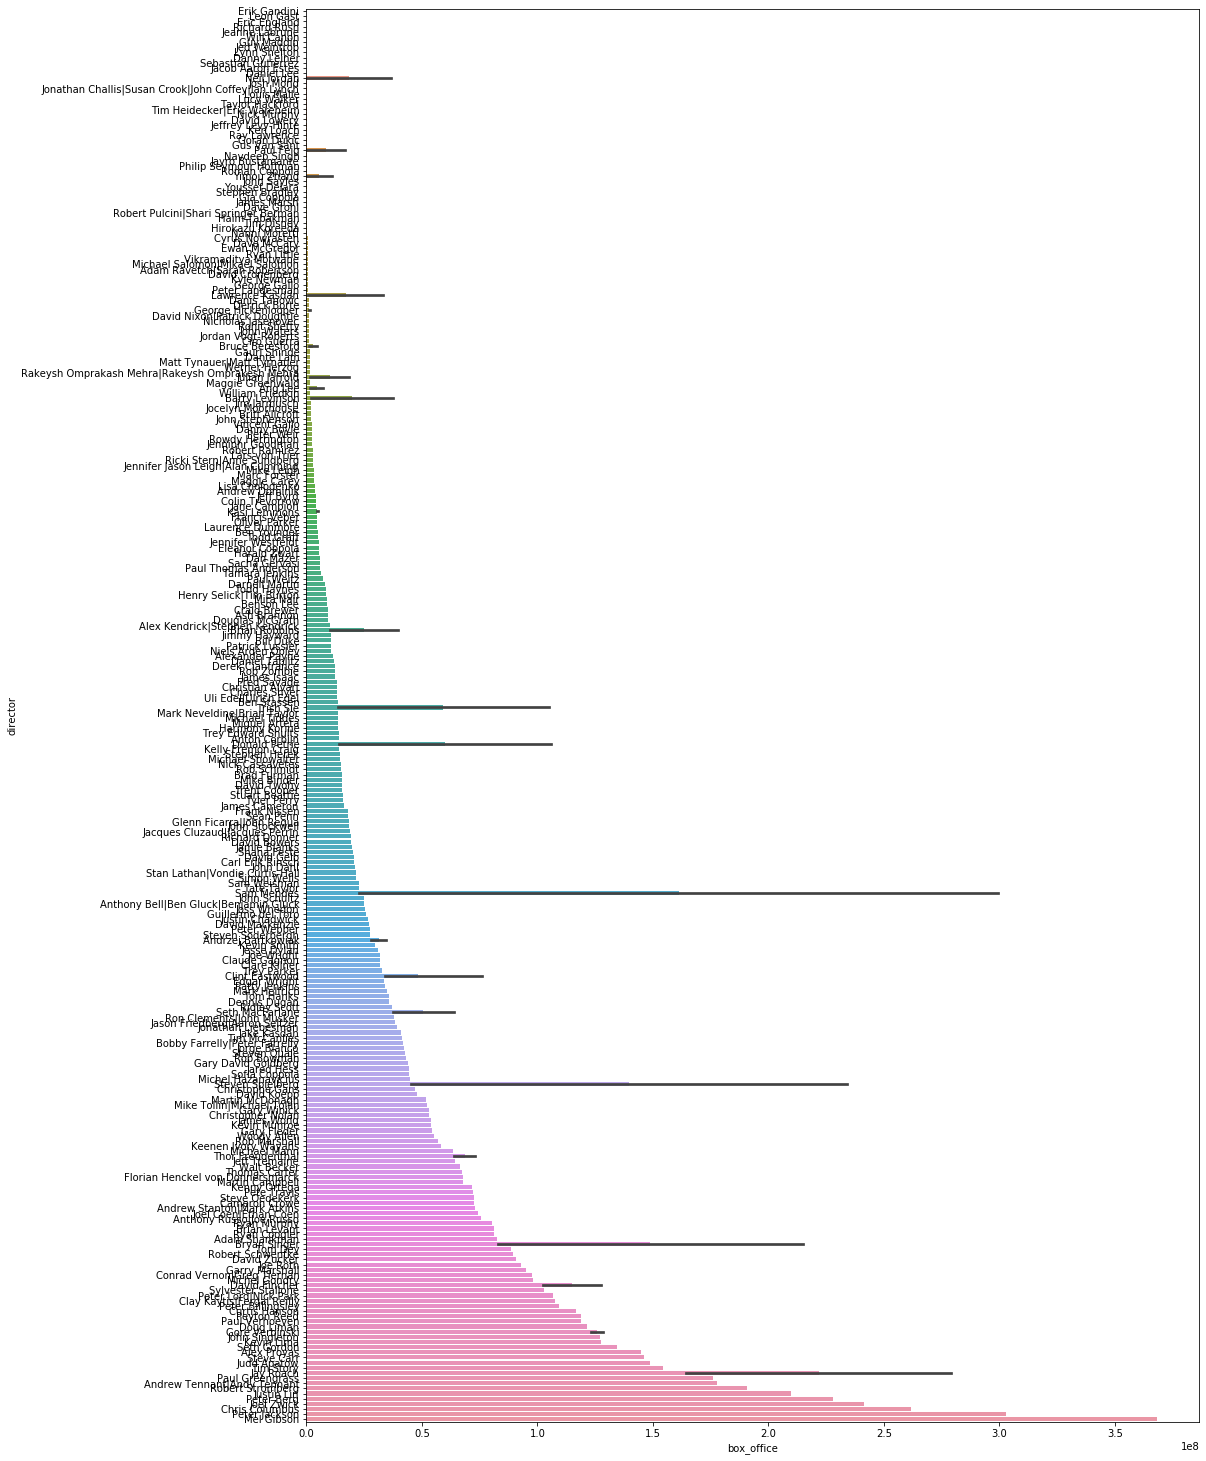

In [103]:
plt.figure(figsize =(16,26))
sns.barplot(x='box_office',y='director',data=df_rt_movie)

In [105]:
df_rt_movie.duplicated().any()

False

#### At this point we have 340 movies with credible box-office info. 
#### Let's join with the dataframe containing the reviews using the id columns

In [106]:
df_rt_rev.set_index('id',inplace=True)

In [108]:
df_rt_rev.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [109]:
df_rt_movie.set_index('id',inplace=True)
df_rt_movie.head()

,index,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,,
1260,970,With the recent assault on Berlusconi in Milan...,NR,Documentary|Special Interest|Television,Erik Gandini,Erik Gandini,"Aug 28, 2009","Sep 7, 2010",$,363,84 minutes,Lorber Films
469,359,"Jacqueline Kennedy Onassis sued him, Marlon Br...",PG-13,Documentary|Musical and Performing Arts|Specia...,Leon Gast,NaN,"Jul 30, 2010","Oct 19, 2010",$,2367,88 minutes,Magnolia Pictures
895,697,"After a sexual assault by a random stranger, S...",NR,Drama|Horror|Mystery and Suspense,Eric England,Eric England,"Nov 22, 2013","Mar 18, 2014",$,3328,84 minutes,IFC Films
884,691,Freebie (James Caan) and the Bean (Alan Arkin)...,R,Action and Adventure|Comedy|Drama,Richard Rush,Robert Kaufman,"Dec 25, 1974","Jan 11, 2011",$,8300,114 minutes,Warner Bros. Pictures
1639,1269,In this darkly erotic drama from cult filmmake...,NR,Art House and International|Drama,Jeanne Labrune,Jeanne Labrune|Richard Debuisne,"Aug 26, 2011","Jan 17, 2012",$,8856,95 minutes,First Run Features


In [110]:
dfa=df_rt_movie.join(df_rt_rev,how='inner',rsuffix='review')

In [111]:
dfa

,index,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,ratingreview,fresh,critic,top_critic,publisher,date
id,,,,,,,,,,,,,,,,,,,
3,1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1555,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,33886034,106 minutes,New Line Cinema,NaN,B-,fresh,Scott Mendelson,0,rec.arts.movies.reviews,"April 25, 2007"
1996,1555,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,33886034,106 minutes,New Line Cinema,NaN,6/10,fresh,Raam Tarat,0,Future Movies UK,"August 26, 2006"
1996,1555,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,33886034,106 minutes,New Line Cinema,NaN,4/5,fresh,NaN,0,Bullz-Eye.com,"August 19, 2006"


### Feature engineering
#### categorical feature low/medium/high based on box_office $ amounts

In [113]:
dfa['box_office'].describe()

count    3.331000e+04
mean     5.315433e+07
std      6.906961e+07
min      3.630000e+02
25%      6.100613e+06
50%      2.680000e+07
75%      7.422362e+07
max      3.680000e+08
Name: box_office, dtype: float64

In [115]:
income_lmh = []
for amount in dfa['box_office']:
    if amount < 6000000:
        income_lmh.append('low')
    elif  amount <74000000:
        income_lmh.append('medium')
    else:
        income_lmh.append('high')
print(len(income_lmh))
dfa['income_lmh'] = income_lmh
dfa

33310


,index,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,ratingreview,fresh,critic,top_critic,publisher,date,income_lmh
id,,,,,,,,,,,,,,,,,,,,
3,1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",low
3,1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",low
3,1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",low
3,1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",low
3,1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1555,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,33886034,106 minutes,New Line Cinema,NaN,B-,fresh,Scott Mendelson,0,rec.arts.movies.reviews,"April 25, 2007",medium
1996,1555,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,33886034,106 minutes,New Line Cinema,NaN,6/10,fresh,Raam Tarat,0,Future Movies UK,"August 26, 2006",medium
1996,1555,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,33886034,106 minutes,New Line Cinema,NaN,4/5,fresh,NaN,0,Bullz-Eye.com,"August 19, 2006",medium


### Now I would like to find most used keywords in reviews for high income_lmh and compare with most used keywords in reviews for low income_lmh

In [118]:
dfb= dfa.loc[dfa ['income_lmh']  == 'high']


In [124]:
goodreviews = ''
for elem in list(dfb.review):
    goodreviews = goodreviews + str(elem)
goodreviews


'The movie is great. It is interesting without being heavy, smart without being pretentious and entertaining without being solicitous.It doesn\'t matter how much of the story is true because the film is the real deal.David O. Russell follows The Fighter and Silver Linings Playbook with the third entry in his "reinvention" trilogy, a film which is getting as much gold and silver on the mantelpiece this award season as his previous two, but less deservedly so.The movie and most of its characters too often feel like caricatures, their energy pilfered from superior movies you\'ve seen before.As cons within cons press loyalties on every side, the film is less about political corruption than the deep longing of its characters to find a piece of solid ground, something they can stake a life on.It busies itself with a rollicking soundtrack, sexy costumes, and increasingly implausible romantic encounters between the film\'s principals.American Hustle amuses with irony, music and wit. It tantali

### Let's clean up our text 

In [149]:
def cleaner(text, punctuation = """.?!*$%^&()@#<>\'/,"[]-;:"""):
#     text= text.strip().strip("\n").strip("\t")
    text=text.replace("\n"," ")
    text=text.replace("\r"," ")
    for punc in punctuation:
        text=text.replace(punc," ")
    text=text.lower()
    return text

In [150]:
goodreviews_cleaned = cleaner(goodreviews)

In [151]:
goodreviews_cleaned

'the movie is great  it is interesting without being heavy  smart without being pretentious and entertaining without being solicitous it doesn t matter how much of the story is true because the film is the real deal david o  russell follows the fighter and silver linings playbook with the third entry in his  reinvention  trilogy  a film which is getting as much gold and silver on the mantelpiece this award season as his previous two  but less deservedly so the movie and most of its characters too often feel like caricatures  their energy pilfered from superior movies you ve seen before as cons within cons press loyalties on every side  the film is less about political corruption than the deep longing of its characters to find a piece of solid ground  something they can stake a life on it busies itself with a rollicking soundtrack  sexy costumes  and increasingly implausible romantic encounters between the film s principals american hustle amuses with irony  music and wit  it tantalizes

In [190]:
# split the text into words
goodwords = goodreviews_cleaned.split()

# create a dictionary
goodwords_counts={}

#iterate through the text
for word in goodwords:
    # update dictionary goodwords_counts
    # get(word,0) = 0 if word not found /or/ the correspnding value of word if found in the dictionary 
    goodwords_counts[word] = goodwords_counts.get(word,0) + 1
    
# turn dictionary in list of tuples for words with 4+ letters
goodwords_tuples=[]
for k,v in goodwords_counts.items():
    if len(k)>=4:
        goodwords_tuples.append((k,v))

# sort words form most used to less used (descending order)
sorted_goodwords_tuples = sorted(goodwords_tuples, key = lambda x:x[1], reverse=True)
top_good_dict = dict(sorted_goodwords_tuples[:500])

In [191]:
top_good_dict

{'that': 2203,
 'with': 1496,
 'this': 1425,
 'movie': 1321,
 'film': 1230,
 'more': 650,
 'than': 599,
 'have': 591,
 'from': 580,
 'like': 554,
 'comedy': 524,
 'about': 487,
 'there': 454,
 'just': 435,
 'what': 423,
 'will': 416,
 'most': 414,
 'good': 393,
 'much': 378,
 'action': 358,
 'into': 352,
 'best': 344,
 'funny': 340,
 'even': 339,
 'story': 338,
 'some': 335,
 'time': 309,
 'they': 303,
 'when': 296,
 'their': 268,
 'enough': 257,
 'been': 256,
 'well': 253,
 'only': 252,
 'never': 252,
 'make': 252,
 'your': 245,
 'while': 232,
 'which': 230,
 'doesn': 224,
 'characters': 220,
 'great': 213,
 'really': 213,
 'very': 211,
 'movies': 209,
 'romantic': 208,
 'better': 208,
 'made': 207,
 'first': 205,
 'should': 202,
 'little': 197,
 'bond': 195,
 'could': 190,
 'love': 186,
 'director': 185,
 'makes': 185,
 'does': 183,
 'still': 182,
 'thriller': 174,
 'work': 173,
 'over': 173,
 'would': 172,
 'many': 168,
 'here': 166,
 'cast': 164,
 'year': 164,
 'something': 160,
 '

In [188]:
len('word')

4